In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [190]:
diabetes_data = pd.read_csv('C:/Users/gotsl/Desktop/pima-indians-diabetes.csv')
#print(diabetes_data.columns)
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies?,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [191]:
# diabetes 데이터 갼략히 보기(feature type 및 Null 값 개수 보기)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies?              768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [192]:
# 모델 평가를 위한 함수 설정
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1 = f1_score(y_test, pred)
    AUC = roc_auc_score(y_test, pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [193]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [194]:
# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]
#y = diabetes_data['Outcome']

# 데이터를 훈련과 테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)

get_clf_eval(y_test, pred, pred_proba)


오차행렬:
 [[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.7270


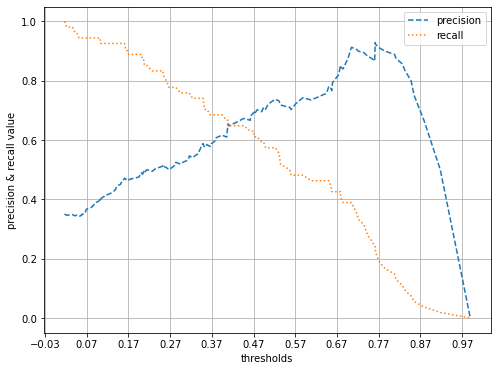

In [195]:
# 임계값별로 정밀도-재현율 시각화
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [196]:
# 데이터의 기초 통계값들
diabetes_data.describe()

,Pregnancies?,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [197]:
#0값을 검사할 피처 명 리스트
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

#피처 별로 반복하면서 데이터 값이 0인 데이터 건수를 추출, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [198]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)

In [199]:
# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]
#y = diabetes_data['Outcome']

# 데이터를 훈련과 테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[: , 1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬:
 [[89 11]
 [22 32]]

정확도: 0.7857
정밀도: 0.7442
재현율: 0.5926
F1: 0.6598
AUC: 0.7413


In [235]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[: ,  1]
get_clf_eval(y_test, pred, pred_proba)


오차행렬:
 [[89 11]
 [22 32]]

정확도: 0.7857
정밀도: 0.7442
재현율: 0.5926
F1: 0.6598
AUC: 0.7413


In [236]:
diabetes_data.describe()

,Pregnancies?,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [242]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds :
        binarizer = Binarizer (threshold = custom_threshold) .fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba )
        
thresholds = [0.3, 0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)



임계값: 0.3
오차행렬:
 [[68 32]
 [11 43]]

정확도: 0.7208
정밀도: 0.5733
재현율: 0.7963
F1: 0.6667
AUC: 0.7381

임계값: 0.33
오차행렬:
 [[73 27]
 [13 41]]

정확도: 0.7403
정밀도: 0.6029
재현율: 0.7593
F1: 0.6721
AUC: 0.7446

임계값: 0.36
오차행렬:
 [[77 23]
 [15 39]]

정확도: 0.7532
정밀도: 0.6290
재현율: 0.7222
F1: 0.6724
AUC: 0.7461

임계값: 0.39
오차행렬:
 [[82 18]
 [17 37]]

정확도: 0.7727
정밀도: 0.6727
재현율: 0.6852
F1: 0.6789
AUC: 0.7526

임계값: 0.42
오차행렬:
 [[84 16]
 [17 37]]

정확도: 0.7857
정밀도: 0.6981
재현율: 0.6852
F1: 0.6916
AUC: 0.7626

임계값: 0.45
오차행렬:
 [[86 14]
 [18 36]]

정확도: 0.7922
정밀도: 0.7200
재현율: 0.6667
F1: 0.6923
AUC: 0.7633

임계값: 0.48
오차행렬:
 [[88 12]
 [21 33]]

정확도: 0.7857
정밀도: 0.7333
재현율: 0.6111
F1: 0.6667
AUC: 0.7456

임계값: 0.5
오차행렬:
 [[89 11]
 [22 32]]

정확도: 0.7857
정밀도: 0.7442
재현율: 0.5926
F1: 0.6598
AUC: 0.7413


In [243]:
#임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

#위에서 구한 Ir_clf의 predict_proba) 예측 확률 array에서 1에 해당하는 칼럼 값을 Binarizer 반환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차행렬:
 [[88 12]
 [21 33]]

정확도: 0.7857
정밀도: 0.7333
재현율: 0.6111
F1: 0.6667
AUC: 0.7456


In [244]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[: ,  1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬:
 [[89 11]
 [22 32]]

정확도: 0.7857
정밀도: 0.7442
재현율: 0.5926
F1: 0.6598
AUC: 0.7413


In [253]:
#임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

#위에서 구한 Ir_clf의 predict_proba) 예측 확률 array에서 1에 해당하는 칼럼 값을 Binarizer 반환
pred_th_048 = binarizer.fit_transform(pred_proba[:].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,])

오차행렬:
 [[88 12]
 [21 33]]

정확도: 0.7857
정밀도: 0.7333
재현율: 0.6111
F1: 0.6667
AUC: 0.7456


(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

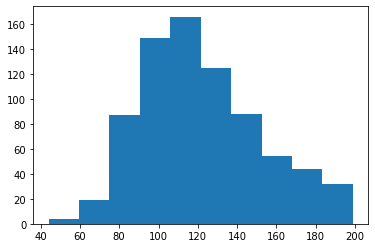

In [240]:
plt.hist(diabetes_data['Glucose'], bins=10)

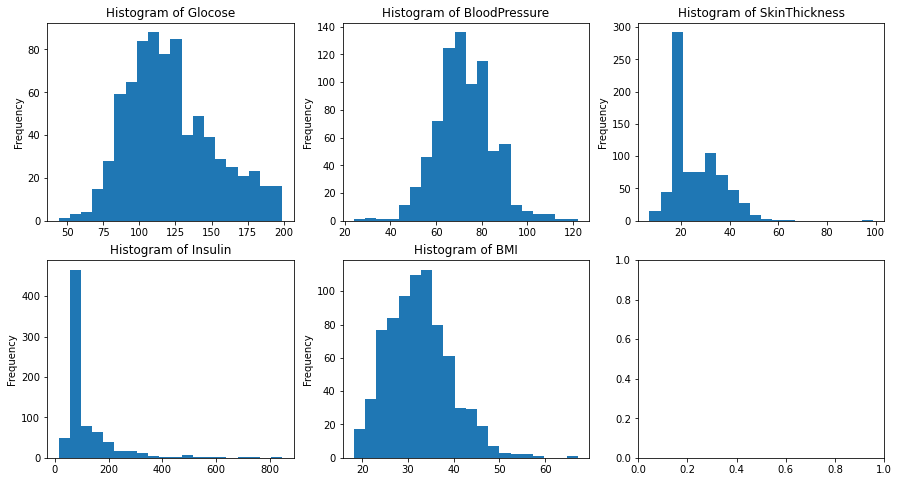

In [218]:
f, ax = plt.subplots(2, 3, figsize = (15, 8))
diabetes_data['Glucose'].plot(kind = 'hist', bins = 20, ax = ax[0, 0])
ax[0,0].set_title('Histogram of Glocose')
diabetes_data['BloodPressure'].plot(kind = 'hist', bins = 20, ax = ax[0, 1])
ax[0,1].set_title('Histogram of BloodPressure')
diabetes_data['SkinThickness'].plot(kind = 'hist', bins = 20, ax = ax[0, 2])
ax[0,2].set_title('Histogram of SkinThickness')
diabetes_data['Insulin'].plot(kind = 'hist', bins = 20, ax = ax[1, 0])
ax[1,0].set_title('Histogram of Insulin')
diabetes_data['BMI'].plot(kind = 'hist', bins = 20, ax = ax[1, 1])
ax[1,1].set_title('Histogram of BMI')

plt.show()

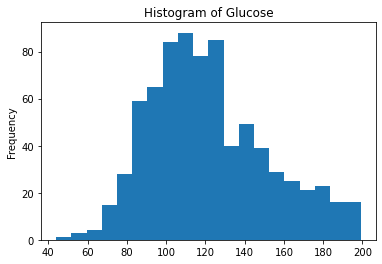

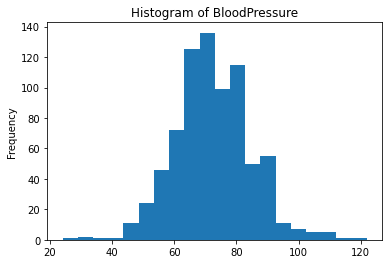

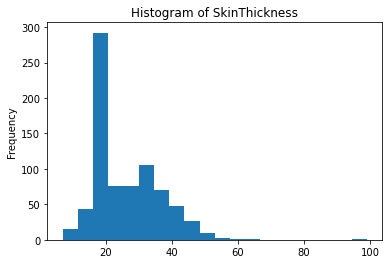

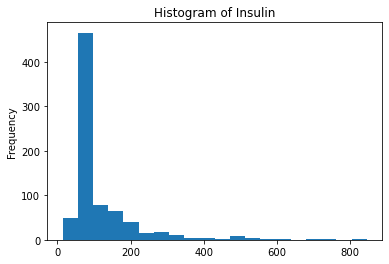

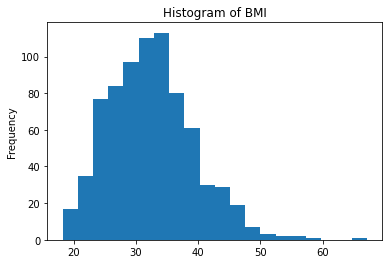

In [219]:
feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def hist_plot(df):
    for col in feature_list:
        df[col].plot(kind='hist', bins=20).set_title('Histogram of '+col)
        plt.show()

hist_plot(diabetes_data)

In [220]:
# 위 컬럼들에 대한 0 값의 비율 확인
#feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
#zero_count = []
#zero_percent = []
#for col in feature_list:
#  zero_num = diabetes_data[diabetes_data[col]==0].shape[0]
#  zero_count.append(zero_num)
#  zero_percent.append(np.round(zero_num/diabetes_data.shape[0]*100, 2))
#
#zero = pd.DataFrame([zero_count, zero_percent], 
#                    columns = feature_list,
#                    index = ['count', 'percent'])

In [221]:
# 위 컬럼들에 대한 0 값의 비율 확인
zero_count = []
zero_percent = []
for col in feature_list:
    zero_num = diabetes_data[diabetes_data[col]==0].shape[0]
    zero_count.append(zero_num)
    zero_percent.append(np.round(zero_num/diabetes_data.shape[0]*100,2))

zero = pd.DataFrame([zero_count, zero_percent], columns=feature_list, index=['count', 'percent']).T
zero

,count,percent
Glucose,0.0,0.0
BloodPressure,0.0,0.0
SkinThickness,0.0,0.0
Insulin,0.0,0.0
BMI,0.0,0.0


In [222]:
# 0 값을 우선 np.nan으로 교체
diabetes_data[feature_list] = diabetes_data[feature_list].replace(0, np.nan)

# 위 5개 feature에 대해 0 값을 평균 값으로 대체
mean_features = diabetes_data[feature_list].mean()
diabetes_data[feature_list] = diabetes_data[feature_list].replace(0, mean_features)

In [223]:
# 데이터 세트에 대해 피처 스케일링을 적용하여 변환하기(로지스틱 회귀의 경우, 숫자 데이터에 스케일링을 적용하는 것이 일반적으로 성능이 좋음)
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 상용하여 데이터 세트에 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


TypeError: get_clf_eval() missing 1 required positional argument: 'pred_proba'

In [224]:
# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [225]:
# 임계값 변화에 대한 예측 성능 확인
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값:  0.3


TypeError: get_clf_eval() missing 1 required positional argument: 'pred_proba'

In [184]:
# 임계값을 0.48로 설정하여 예측 수행
binarizer = Binarizer(thresholds = 0.48)

# Binarizer를 이용하여 예측값 반환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1)) 

get_clf_eval(y_test, pred_th_048)

TypeError: __init__() got an unexpected keyword argument 'thresholds'